<a href="https://colab.research.google.com/github/Yamito548/Act-3.2/blob/main/3_2_Dylan_(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

23_24

#MultinomialNB

In [32]:
# # importación de datos
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:

# # separamos datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)


In [ ]:
# # 1. elegimos clasificador
from sklearn.naive_bayes import MultinomialNB
# 2. instanciamos el modelo
model = MultinomialNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

In [55]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')

In [36]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.64

In [37]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

In [39]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2])

Confusion matrix, without normalization
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

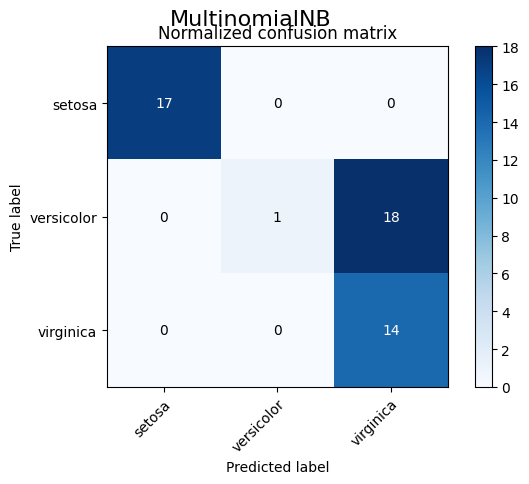

In [40]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')

# BernoulliNB




In [41]:
# importación de datos
import seaborn as sns
iris_2 = sns.load_dataset('iris')
iris_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
# separamos datos de entrada y salida
X2_iris = iris_2.drop('species', axis=1)
y2_iris = iris_2['species']
# separamos train y test
from sklearn.model_selection import train_test_split
X2train, X2test, y2train, y2test = train_test_split(X2_iris, y2_iris, test_size=0.33, random_state=1)

In [50]:
# 1. elegimos clasificador
from sklearn.naive_bayes import BernoulliNB
# 2. instanciamos el modelo
model_BernoulliNB = BernoulliNB(binarize=0.7)
# 3. Entrenamiento con los datos
model_BernoulliNB.fit(X2train, y2train)

BernoulliNB(binarize=0.7)

In [51]:
# 4. Predicción con nuevos datos
y2_model = model_BernoulliNB.predict(X2test)
y2_model

array(['setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')

In [45]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y2test, y2_model) # Precisión del modelo

0.62

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y2test_df= y2test.to_frame()
y2test_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y2test_df

In [48]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y2_model_df= pd.DataFrame(y2_model, columns = ['species'])
y2_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y2_model_array = y2_model_df['species'].to_numpy()
y2_model_array

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2])

Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

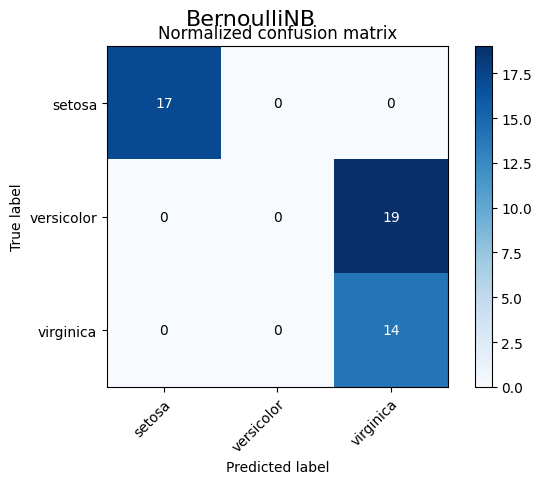

In [49]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases2_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(y2test_df['species'], y2_model_array, classes=clases2_iris, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB')

# ComplementNB

In [ ]:
import seaborn as sns
iris_3 = sns.load_dataset('iris')
iris_3

In [84]:
# separamos datos de entrada y salida
X3_iris = iris_3.drop('species', axis=1)
y3_iris = iris_3['species']
# separamos train y test
from sklearn.model_selection import train_test_split
X3train, X3test, y3train, y3test = train_test_split(X3_iris, y3_iris, test_size=0.33, random_state=1)

In [85]:
# 1. elegimos clasificador
from sklearn.naive_bayes import ComplementNB
# 2. instanciamos el modelo
model3 = ComplementNB()
# 3. Entrenamiento con los datos
model3.fit(Xtrain, ytrain)

ComplementNB()

In [86]:
# 4. Predicción con nuevos datos
y3_model = model3.predict(Xtest)
y3_model

array(['setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')

In [87]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y3test, y3_model) # Precisión del modelo

0.62

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y3test_df= y3test.to_frame()
y3test_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y3test_df

In [90]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y3_model_df= pd.DataFrame(y3_model, columns = ['species'])
y3_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y3_model_array = y3_model_df['species'].to_numpy()
y3_model_array

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2])

Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

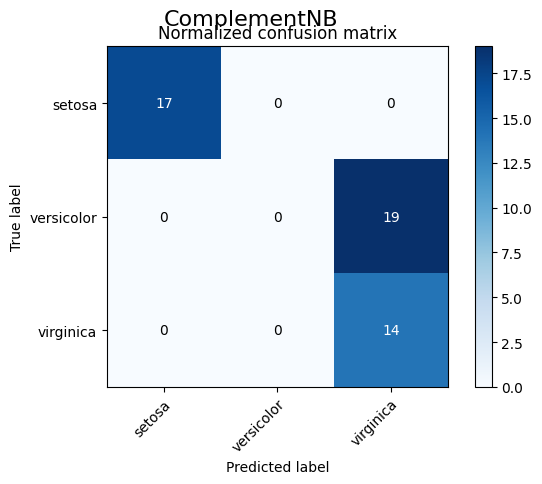

In [91]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases3_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(y3test_df['species'], y3_model_array, classes=clases3_iris, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')

#CategoricalNB

In [ ]:
# # importación de datos
import seaborn as sns
iris_4 = sns.load_dataset('iris')
iris_4

In [95]:
# separamos datos de entrada y salida
X4_iris = iris_4.drop('species', axis=1)
y4_iris = iris_4['species']
# separamos train y test
from sklearn.model_selection import train_test_split
X4train, X4test, y4train, y4test = train_test_split(X4_iris, y4_iris, test_size=0.33, random_state=1)

In [98]:
# 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB
# 2. instanciamos el modelo
model_4 = CategoricalNB()
# 3. Entrenamiento con los datos
model_4.fit(X4train, y4train)

CategoricalNB()

In [100]:
# 4. Predicción con nuevos datos
y4_model = model_4.predict(Xtest)
y4_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

In [101]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y4test, y4_model) # Precisión del modelo

0.98

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y4test_df= y4test.to_frame()
y4test_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y4test_df

In [103]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y4_model_df= pd.DataFrame(y4_model, columns = ['species'])
y4_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y4_model_array = y4_model_df['species'].to_numpy()
y4_model_array

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

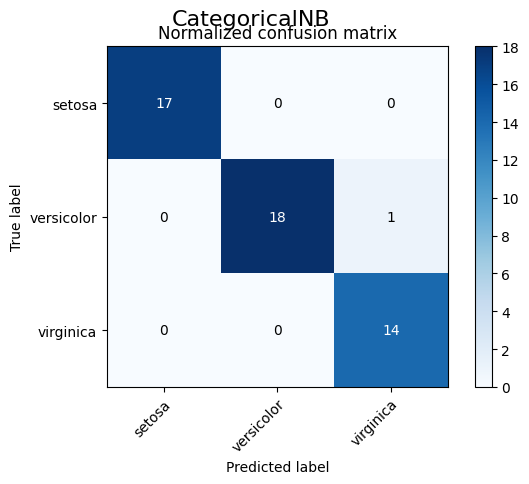

In [104]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases4_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(y4test_df['species'], y4_model_array, classes=clases4_iris, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB')

#GaussianNB

In [115]:
# # importación de datos
import seaborn as sns
iris5 = sns.load_dataset('iris')
iris5

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [116]:
# separamos datos de entrada y salida
X5_iris = iris5.drop('species', axis=1)
y5_iris = iris5['species']
# separamos train y test
from sklearn.model_selection import train_test_split
X5train, X5test, y5train, y5test = train_test_split(X5_iris, y5_iris, test_size=0.33, random_state=1)

In [117]:
# 1. elegimos clasificador
from sklearn.naive_bayes import GaussianNB
# 2. instanciamos el modelo
model5 = GaussianNB()
# 3. Entrenamiento con los datos
model5.fit(X5train, y5train)

GaussianNB()

In [118]:
# 4. Predicción con nuevos datos
y5_model = model5.predict(Xtest)
y5_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

In [119]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y5test, y5_model) # Precisión del modelo

0.94

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y5test_df= y5test.to_frame()
y5test_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y5test_df

In [113]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y5_model_df= pd.DataFrame(y5_model, columns = ['species'])
y5_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y5_model_array = y5_model_df['species'].to_numpy()
y5_model_array

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

Confusion matrix, without normalization
[[17  0  0]
 [ 0 17  2]
 [ 0  1 13]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

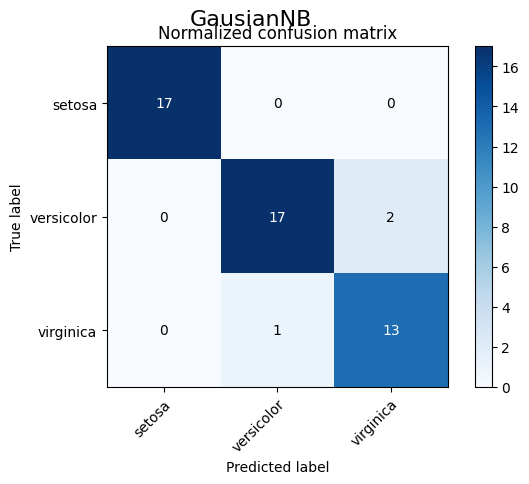

In [120]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases5_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(y5test_df['species'], y5_model_array, classes=clases5_iris, normalize=False, title='Normalized confusion matrix', titleSup='GausianNB')